Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Model and vectorizer saved successfully.


C:\Users\anant\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anant\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anant\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

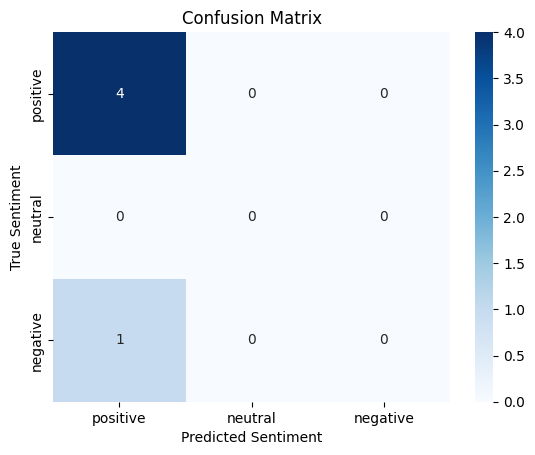

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the dataset
file_path = r"C:\Users\anant\Desktop\Ananthu\4-MCA\SEM-1\4-ADBMS\Project\backend\survey_analysis.xlsx"
data = pd.read_excel(file_path)

# Preprocessing: Assign sentiment labels based on counts
def assign_sentiment(row):
    if row['yes_count'] > row['no_count'] and row['yes_count'] > row['neutral_count']:
        return "positive"
    elif row['no_count'] > row['yes_count'] and row['no_count'] > row['neutral_count']:
        return "negative"
    else:
        return "neutral"

data['sentiment'] = data.apply(assign_sentiment, axis=1)

# Features and target
X = data['question_text']  # Input: Survey questions
y = data['sentiment']      # Target: Sentiment labels

# Convert text data into numerical representation using TF-IDF
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the TF-IDF vectorizer and the model for later use
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(model, "sentiment_model.pkl")
print("Model and vectorizer saved successfully.")

# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "neutral", "negative"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()
